In [1]:
#from useful_scripts.useful_scripts.csv_maker import make_results_csv

In [2]:
#make_results_csv( 'bench_results' , '' , 'results_bench.csv'  , 'benchmark_images' )

In [1]:
import pandas as pd
df = pd.read_csv('results_bench.csv')


In [3]:
df.head()

,Image_path,ground_truth_label,Predicted
0,benchmark_images/animated/11.jpg,0,0
1,benchmark_images/animated/12.jpg,0,0
2,benchmark_images/animated/14.jpg,0,0
3,benchmark_images/animated/3.jpg,0,2
4,benchmark_images/animated/6.jpg,0,0


In [4]:
comparison = df.iloc[:, [1,2]].values

In [5]:
import numpy as np
samples = comparison.shape[0]
conf_matrix = np.zeros( (5, 5) , dtype=np.int32 )

for i in range(samples):
    conf_matrix[ int(comparison[i][0]) ][ int(comparison[i][1])  ] += 1

print(conf_matrix)

[[12  0  3  0  0]
 [ 0  1  9  0  4]
 [ 0  1  7  0  4]
 [ 3  2  3  0 12]
 [ 0  1  2  0 15]]


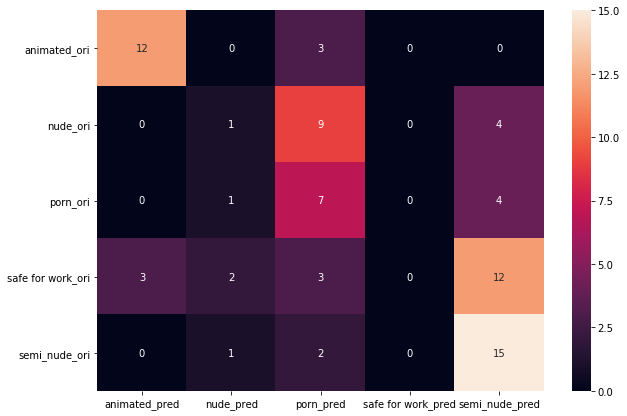

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_cm = pd.DataFrame(conf_matrix, index = ['animated_ori' , 'nude_ori' , 'porn_ori' , 'safe for work_ori' , 'semi_nude_ori'],
                  columns = ['animated_pred' , 'nude_pred' , 'porn_pred' , 'safe for work_pred' , 'semi_nude_pred'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [7]:
wrong_examples = df[df['ground_truth_label'] != df['Predicted']].sample(n=9)

In [8]:
# from IPython.display import Image
# from IPython.display import display



# for i in range(9):
#     x= Image(wrong_examples.iloc[i,0])
#     display(x)

# ;



In [9]:
def get_metrics_for_single_class(class_label, conf_matrix):
    tn = 0
    for i in range(5):
        for j in range(5):
            if i != class_label or j != class_label:
                tn += conf_matrix[i][j]


    tp = conf_matrix[class_label][class_label]

    fp = np.sum(conf_matrix[class_label][:]  ) - conf_matrix[class_label][class_label] 
    fn =  np.sum(conf_matrix[:][class_label] ) -conf_matrix[class_label][class_label]

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = (precision*recall)/ (precision+recall)
    
    return accuracy , precision , recall , f1_score 

In [10]:
acc , pre , rec , f1 = get_metrics_for_single_class(0,conf_matrix)
print(acc ,pre, rec , f1)

0.9294117647058824 0.8 0.8 0.4000000000000001


In [11]:
acc , pre , rec , f1 = get_metrics_for_single_class(1,conf_matrix)
print(acc ,pre, rec , f1)

0.7523809523809524 0.07142857142857142 0.07142857142857142 0.03571428571428571


In [12]:
acc , pre , rec , f1 = get_metrics_for_single_class(2,conf_matrix)
print(acc ,pre, rec , f1)

0.8876404494382022 0.5833333333333334 0.5833333333333334 0.2916666666666667


In [13]:
acc , pre , rec , f1 = get_metrics_for_single_class(3,conf_matrix)
print(acc ,pre, rec , f1)

0.6638655462184874 0.0 0.0 nan


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [15]:
acc , pre , rec , f1 = get_metrics_for_single_class(4,conf_matrix)
print(acc ,pre, rec , f1)

0.9294117647058824 0.8333333333333334 0.8333333333333334 0.4166666666666667


In [16]:
def get_metrics_for_nsfw():
    safe_for_work_label = 3
    tp = 0
    for i in range(5):
        for j in range(5):
            if i != safe_for_work_label or j != safe_for_work_label:
                tp += conf_matrix[i][j]


    tn = conf_matrix[3][3]

    fn = conf_matrix[3][0] + conf_matrix[3][1]  + conf_matrix[3][2] + conf_matrix[3][4]  
    fp = conf_matrix[2][3] + conf_matrix[1][3]  + conf_matrix[0][3] + conf_matrix[4][3] 

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = (precision*recall)/ (precision+recall)
    return accuracy , precision , recall , f1_score


In [17]:
acc , pre , rec , f1 = get_metrics_for_nsfw()
print(acc ,pre, rec , f1)

0.797979797979798 1.0 0.797979797979798 0.44382022471910115
